In [1]:
"""
A simple example of a mini-batch gradient descent with a learning rate
"""
#Load libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Define learning rate function

def learning_rate(t,t0=1,t1=100):
    """
    Learning rate function
    #Arguments
    t, int: current learning rate time step which is modelled based on the epoch
    t0, int: baseline learning rate, set to 1 as a default
    t1 int: baseline learning rate to scale, set to 100 as a default
    #Returns
    """
    return t0/(t+t1)

In [3]:
def GradientDescent(X,ypred,y):
    """
    Gradient descent function
    NOTE gradient descent and other custom functions should be integrated into Tensorflow backend for faster calculations.

    #Arguments

    X, array(int/float): sample values
    y, array(int/float): actual values
    ypred, array(int/float): prediced values

    #Returns
    Jacobian for the gradient with respect to theta
    """
    grad=2*np.dot(X.T,(ypred-y)) #MSE grad with respect ypred theta
    return grad

[[ 0.38350993  1.        ]
 [ 1.41074602  1.        ]
 [ 1.86183253  1.        ]
 [-2.17211669  1.        ]
 [ 0.73151605  1.        ]
 [ 0.24432447  1.        ]
 [-0.7912756   1.        ]
 [ 0.31487953  1.        ]
 [-0.03930192  1.        ]]
[[ 21.96246641]
 [ 26.4786424 ]
 [ 15.66351997]
 [-49.27409331]
 [ 47.32620201]
 [-15.29910605]
 [-25.06710023]
 [ 11.47656816]
 [ 25.58989468]]


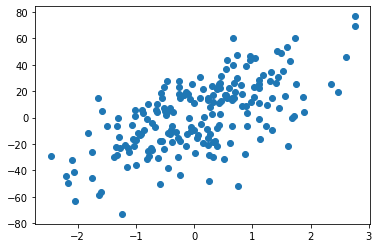

In [4]:
#Generate test data for a simple linear model
from sklearn.datasets import make_regression

X,y=make_regression(n_samples=200, n_features=1, n_informative=1, n_targets=1, noise=20)
X=np.c_[X,np.ones((200,1))]
y=y.reshape(200,1)
print(X[1:10])
print(y[1:10])

plt.scatter(X[:,0],y)
plt.show()

In [ ]:
#Generate test data for a simple linear model using an alternative method

X=np.linspace(-2,2,200)
X=np.c_[X,np.ones((200,1))]


theta=np.array([[4],[3]])

noise=np.random.normal(0,1,200)
noise=noise.reshape(-1,1)
y=np.dot(X,theta)+noise

plt.scatter(X[:,0],y)
plt.show()

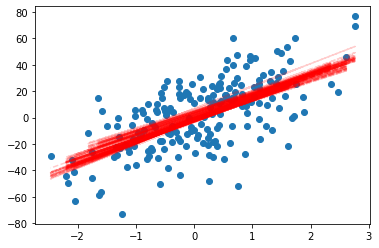

In [5]:
EPOCHS=100

BATCH=50 #the number of samples to consider for a mini-batch descent

theta=np.random.randn(2,1) #for a simple linear regression k,b tems
# x*k+b=1

plt.scatter(X[:,0],y)
thetas=[]

lr_base=1
for epoch in range(1,EPOCHS):

    idx=np.random.randint(0,len(X)-BATCH+1)

    X_sample=X[idx:idx+BATCH]
    y_sample=y[idx:idx+BATCH]

    thetas+=[theta]

    #Calculate and update gradient
    ypred=np.dot(X_sample,theta)
        
    grad=GradientDescent(X_sample,ypred,y_sample)
    lr=learning_rate(lr_base)
    theta=theta-grad*lr
    lr_base+=1
    #visualise epoch fitting 
    if epoch>0:
        X_samples=X[idx:idx+BATCH]

        yplot=np.dot(X_samples,theta) #use the last best theta
        plt.plot(X_samples[:,0],yplot,'--r',alpha=0.2)

plt.show()

Optimal values [[14.37631738]
 [ 1.06620017]]


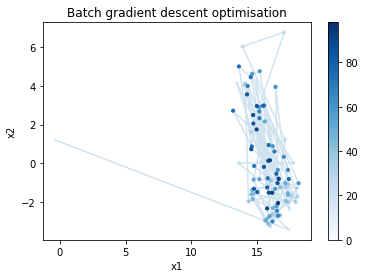

In [22]:
#Explore how a mini-batch gradient descent converges
print("Optimal values",theta)

x1,x2=zip(*thetas)



plt.scatter(x1,x2,s=10,c=list(range(len(thetas))),cmap='Blues')
plt.plot(x1,x2,alpha=0.2)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Batch gradient descent optimisation")
plt.colorbar()
plt.show()